# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import pathlib
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


<AxesSubplot:xlabel='Year'>

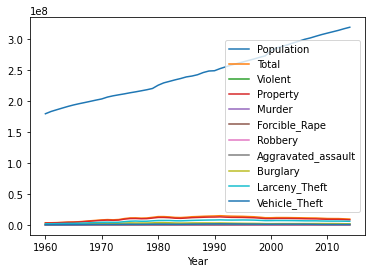

In [2]:
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")


df.set_index("Year", inplace=True)
df.plot()

In [3]:
df_usable = df.loc[1960:2010]
to_predict = df.loc[2011:2014]

In [4]:
to_predict

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


In [5]:
df_usable.tail()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
2006,299398484,11401511,1418043,9983568,17030,92757,447403,860853,2183746,6607013,1192809
2007,301621157,11251828,1408337,9843481,16929,90427,445125,855856,2176140,6568572,1095769
2008,304374846,11160543,1392628,9767915,16442,90479,443574,842134,2228474,6588046,958629
2009,307006550,10762956,1325896,9337060,15399,89241,408742,812514,2203313,6338095,795652
2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565


In [6]:
y_usable = df_usable['Murder']
y_usable.head()

Year
1960    9110
1961    8740
1962    8530
1963    8640
1964    9360
Name: Murder, dtype: int64

In [7]:
# Normalizo el df. sin la columna que va a ser el target
scaler = MinMaxScaler()
_usable_normalizaded = scaler.fit_transform(df_usable)

In [8]:
_usable_normalizaded

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.58688930e-02, 0.00000000e+00, 2.01356142e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.82202017e-02, 9.03496479e-03, 5.65758816e-04, 1.04303931e-02,
        1.29870130e-02, 3.26548384e-04, 0.00000000e+00, 2.48652284e-03,
        1.30068329e-02, 9.16205383e-03, 5.84926884e-03],
       [4.95959665e-02, 3.20314744e-02, 7.93887371e-03, 3.59843493e-02,
        0.00000000e+00, 3.91858060e-03, 7.21095928e-03, 1.04454341e-02,
        2.85109778e-02, 3.72526564e-02, 2.89463817e-02],
       [7.04563747e-02, 6.31315989e-02, 1.73438536e-02, 7.06306891e-02,
        6.80272109e-03, 5.00707521e-03, 1.68657282e-02, 2.02692374e-02,
        6.04557594e-02, 7.03696634e-02, 6.00674916e-02],
       [9.09014207e-02, 1.02744436e-01, 4.60880515e-02, 1.11977213e-01,
        5.13296228e-02, 4.60433221e-02, 4.08219461e-02, 4.96591222e-02,
        1.04436197e-01, 1.04822803e-01, 1.08436445e-

In [9]:
df_usable_normalizaded = pd.DataFrame(_usable_normalizaded)
df_usable_normalizaded.columns = df_usable.columns

In [10]:
df_usable_normalizaded.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0.000000,0.000000,0.000000,0.000000,0.035869,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1,0.028220,0.009035,0.000566,0.010430,0.012987,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
2,0.049596,0.032031,0.007939,0.035984,0.000000,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
3,0.070456,0.063132,0.017344,0.070631,0.006803,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
4,0.090901,0.102744,0.046088,0.111977,0.051330,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


In [11]:
# Quito el target del df anterior
X = df_usable_normalizaded.drop(['Murder'], axis=1)

In [12]:
X.shape

(51, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_usable.values, test_size=0.2, random_state=47)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(40, 10)
(40,)
(11, 10)
(11,)


2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?

Lo calculo para el target Murder y las variables el resto de columnas del dataframe

In [15]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(X.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [17]:
model = build_model()

Con el summary muestro una descripción simple del modelo

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


Entreno el modelo

In [17]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [18]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2430444.50,1379.893433,2430444.50,1623764.25,1168.920288,1623764.25,995
996,2408656.25,1374.545288,2408656.25,1570360.25,1150.456421,1570360.25,996
997,2387226.25,1365.773315,2387226.25,1584200.75,1153.030640,1584200.75,997
998,2365739.75,1360.384521,2365739.75,1530435.25,1134.489868,1530435.25,998
999,2344614.00,1351.610596,2344614.00,1545184.00,1137.076782,1545184.00,999


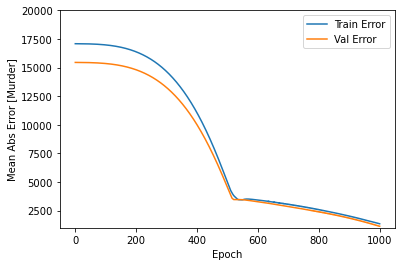

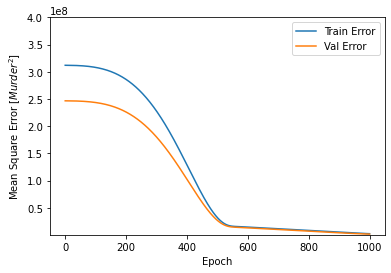

In [19]:
# Función para imprimir el error de validación y de entrenamiento.abs
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([1000,20000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([300000,400000000])
  plt.legend()
  plt.show()


plot_history(history)

In [20]:
to_predict_notarget = to_predict.drop(['Murder'], axis=1)

In [24]:
# Uso para predecir los valores apartados al principio que están en to_predict
predictions = model.predict(to_predict_notarget)
print(predictions)

[[2.7522099e+11]
 [2.7665564e+11]
 [2.7728616e+11]
 [2.7762504e+11]]


In [25]:
# Estos son lo valores que debería haber obtenido
to_predict['Murder']

Year
2011    14661
2012    14866
2013    14319
2014    14249
Name: Murder, dtype: int64

No predice nada bien

## Sin utilizar las funciones

3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 

Construyo el modelo

In [26]:
model1 = models.Sequential()

# Primera capa
model1.add(keras.layers.Dense(units=32, input_dim=len(X.keys()),activation="relu"))
# Segunda capa
model1.add(keras.layers.Dense(units=32, activation="relu"))
# Tercera capa
model1.add(keras.layers.Dense(units=64, activation="relu"))
# Salida
model1.add(keras.layers.Dense(units=1, activation='linear'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


Compilo el modelo utiizando como optimizador 'adam'

In [28]:
model1.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

Entreno el modelo

In [29]:
print(X_train.shape)

(40, 10)


In [30]:
print(y_train.shape)

(40,)


In [31]:
# Entreno el modelo1
history1 = model1.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=0)

In [32]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,9801568.0,2821.088379,9801568.0,8183627.5,2570.387207,8183627.5,995
996,9791206.0,2819.572510,9791206.0,8173167.0,2568.606445,8173167.0,996
997,9780842.0,2818.054932,9780842.0,8162705.5,2566.825195,8162705.5,997
998,9770475.0,2816.536133,9770475.0,8152246.0,2565.042480,8152246.0,998
999,9760109.0,2815.016602,9760109.0,8141782.0,2563.258057,8141782.0,999


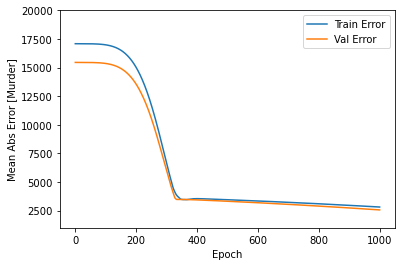

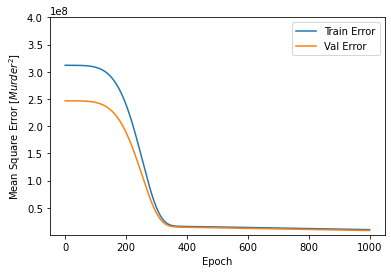

In [33]:
# Función para imprimir el error de validación y de entrenamiento.abs
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([1000,20000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([300000,400000000])
  plt.legend()
  plt.show()


plot_history(history1)

Compilo el modelo utiizando un tercer optimiador, en este caso 'SGD'

In [54]:
# Construyo el modelo2
model2 = models.Sequential() 

# Primera capa
model2.add(keras.layers.Dense(units=32, input_dim=len(X.keys()),activation="relu"))
# input_dim es el numero de columnas del df que voy a tener en la variable X 
# Segunda capa
model2.add(keras.layers.Dense(units=32, activation="relu"))
# Tercera capa
model2.add(keras.layers.Dense(units=64, activation="relu"))
# Salida
model2.add(keras.layers.Dense(units=1, activation='linear'))
model2.summary()

Model: &quot;sequential_3&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [55]:
model2.compile(optimizer='sgd',
              loss='mse',
              metrics=['mae', 'mse'])

In [56]:
# Entreno el modelo2
history2 = model2.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=0)

In [57]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist2.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,3.119254e+08,1.708577e+04,3.119254e+08,3.466062e+15,5.546442e+07,3.466062e+15,0
1,4.349673e+15,6.136446e+07,4.349673e+15,inf,5.719409e+23,inf,1
2,inf,5.719409e+23,inf,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,4


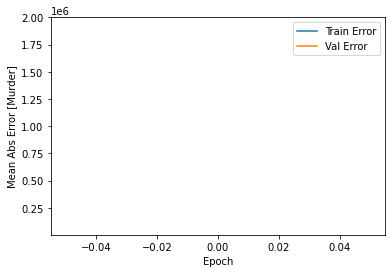

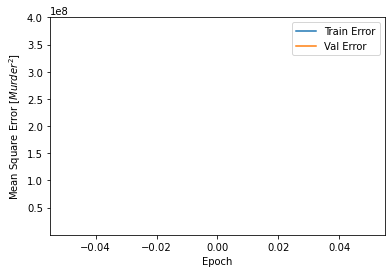

In [53]:
# Función para imprimir el error de validación y de entrenamiento.abs
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([1000,2000000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([300,400000000])
  plt.legend()
  plt.show()


plot_history(history2)

Los mejores resultados se obtienen con el optimizador RMSprop

4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?

Con el optimizador RMSprop y la función de activación Sigmoid

In [100]:
# Construyo el modelo4
model4 = models.Sequential()

# Primera capa
model4.add(keras.layers.Dense(units=32, input_dim=len(X.keys()),activation="sigmoid"))
# Segunda capa
model4.add(keras.layers.Dense(units=32, activation="sigmoid"))
# Tercera capa
model4.add(keras.layers.Dense(units=64, activation="sigmoid"))
# Salida
model4.add(keras.layers.Dense(units=1, activation='linear'))
model4.summary()

Model: &quot;sequential_9&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [101]:
#Compilo
model4.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mae', 'mse'])

tf.keras.optimizers.RMSprop(0.001)

In [102]:
# Entreno el modelo4
history4 = model4.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=0)

In [104]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch
hist4.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,311946304.0,17086.378906,311946304.0,246602848.0,15451.733398,246602848.0,0
1,311938112.0,17086.140625,311938112.0,246597472.0,15451.559570,246597472.0,1
2,311932096.0,17085.964844,311932096.0,246592896.0,15451.412109,246592896.0,2
3,311927072.0,17085.816406,311927072.0,246588832.0,15451.279297,246588832.0,3
4,311922560.0,17085.687500,311922560.0,246585056.0,15451.158203,246585056.0,4


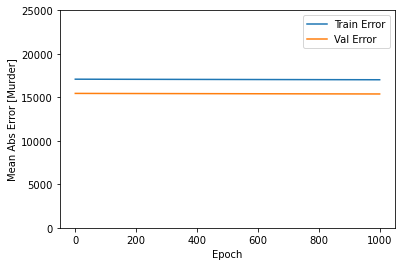

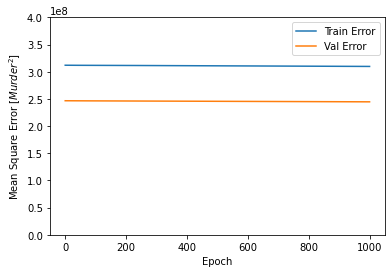

In [105]:
# Función para imprimir el error de validación y de entrenamiento.abs
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,25000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,400000000])
  plt.legend()
  plt.show()

plot_history(history4)

In [ ]:
Con la función de optimización Sigmoide los resultados son peores y no se produce cambios con el entrenamiento

5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)

Utilizo el optimizador RMSprop y la función de activación relu.

In [106]:
# Construyo el modelo2
model5 = models.Sequential()

# Primera capa
model5.add(keras.layers.Dense(units=17, input_dim=len(X.keys()),activation="relu"))
# Segunda capa
model5.add(keras.layers.Dense(units=9, activation="relu"))
# Tercera capa
model5.add(keras.layers.Dense(units=4, activation="relu"))

# Cuarta capa
model5.add(keras.layers.Dense(units=16, input_dim=len(X.keys()),activation="relu"))
# Quinta capa
model5.add(keras.layers.Dense(units=4, activation="relu"))
# Sexta capa
model5.add(keras.layers.Dense(units=44, activation="relu"))

# Salida
model5.add(keras.layers.Dense(units=1, activation='linear'))
model5.summary()

Model: &quot;sequential_10&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 17)                187       
_________________________________________________________________
dense_37 (Dense)             (None, 9)                 162       
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_39 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_41 (Dense)             (None, 44)                220       
_________________________________________________________________
dense_42 (Dense)             (None, 1)     

In [107]:
#Compilo
model5.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mae', 'mse'])

In [108]:
# Entreno el modelo4
history5 = model5.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=0)

In [109]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist5 = pd.DataFrame(history5.history)
hist5['epoch'] = history5.epoch
hist5.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,311925888.0,17085.781250,311925888.0,246591504.0,15451.365234,246591504.0,0
1,311925536.0,17085.773438,311925536.0,246591264.0,15451.357422,246591264.0,1
2,311925248.0,17085.763672,311925248.0,246590992.0,15451.349609,246590992.0,2
3,311924960.0,17085.753906,311924960.0,246590752.0,15451.341797,246590752.0,3
4,311924672.0,17085.746094,311924672.0,246590496.0,15451.333984,246590496.0,4


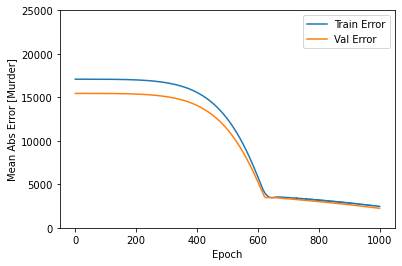

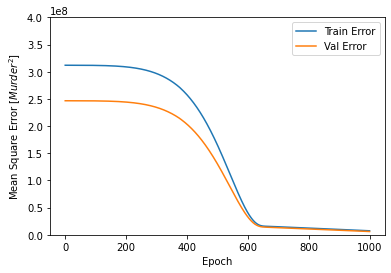

In [110]:
# Función para imprimir el error de validación y de entrenamiento.
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,25000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,400000000])
  plt.legend()
  plt.show()

plot_history(history5)

Esta red no da mejor resultado que la mejor del apartado 3

6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?

https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d/43399308

### Explicación de dimensiones en conv1D

- num_features == tiene que ser el número de variables (10)

- dims == número de dimensiones de cada variable (1)

- input_shape=(num_features, dims))

Construyo el modelo

In [ ]:
# El None representa el número de datos que vamos a entrenar
input_shape=(None,11,1)

In [18]:
model6 = models.Sequential()

# Primera capa
model6.add(keras.layers.Conv1D(input_shape=(10, 1), filters=8, kernel_size=(3), activation="relu", padding="valid"))
# Segunda capa
model6.add(keras.layers.Conv1D(filters=16, kernel_size=(3), activation="relu", padding="valid"))

# Salida
model6.add(keras.layers.Dense(1, activation='linear'))
model6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 8)              32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 16)             400       
_________________________________________________________________
dense_8 (Dense)              (None, 6, 1)              17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [19]:
model6.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [20]:
import numpy as np
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# El axis va a especificar la dimensión en la que se va a situar la dimensión 1, que representa el número de "trozos" de datos.
X1 = np.expand_dims(X_train, axis=2)
X1.shape

(40, 10, 1)

In [21]:
X_train.shape

(40, 10)

In [37]:
y_test.shape

(11,)

In [34]:
X1.shape

(40, 10, 1)

In [22]:
### Entrenamiento del modelo (epochs). Se registra la precisión del modelo en el objeto history
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('J', end='')

In [23]:
# Entreno el modelo6
history6 = model6.fit(X1, y_train, epochs=500, validation_split = 0.2, verbose=0,callbacks=[early_stop, PrintDot()])

JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ

In [24]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist6 = pd.DataFrame(history6.history)
hist6['epoch'] = history6.epoch
hist6.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,311932480.0,17085.953125,311932480.0,246596224.0,15451.507812,246596224.0,0
1,311931872.0,17085.937500,311931872.0,246595744.0,15451.492188,246595744.0,1
2,311931296.0,17085.921875,311931296.0,246595264.0,15451.478516,246595264.0,2
3,311930688.0,17085.906250,311930688.0,246594816.0,15451.463867,246594816.0,3
4,311930144.0,17085.890625,311930144.0,246594368.0,15451.450195,246594368.0,4


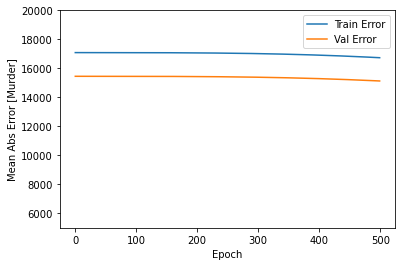

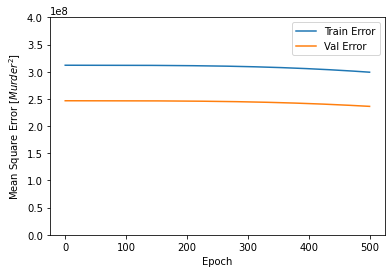

In [31]:
# Función para imprimir el error de validación y de entrenamiento.
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([5000,20000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,400000000])
  plt.legend()
  plt.show()

plot_history(history6)

In [33]:
X_test.shape

(11, 10)

In [38]:
X1_test = np.expand_dims(X_test, axis=2)
X1_test.shape

(11, 10, 1)

In [39]:
loss, mae, mse = model6.evaluate(X1_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Murder".format(mae))

1/1 - 0s - loss: 406902976.0000 - mae: 19912.9551 - mse: 406902976.0000
Testing set Mean Abs Error: 19912.96 Murder


7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

Si entrenara la red solamente con los valores hasta el año 2000, los resultados serian peores y que estoy utilizando menos datos para enseñar a la red.